In [1]:
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from cartopy import crs as ccrs

from plot_functions import (
    plot_difference,
    side_by_side_plot,
    get_wrfout_var,
    get_wrfout_uhi,
    get_wrfout_q,
    get_wrfout_wspd,
    add_subplot,
    generate_cmap_for_landuse,
    get_extent,
    plot_colormesh,
)


In [2]:
# path to experiment output files

wur_path = "../results/wur/wrfout_d04_2019-07-23_06:00:00"
wur_lcz_path = "../results/wur/wrfout_d04_2019-07-23_06:00:00"

## Humidity


(<Figure size 1500x500 with 2 Axes>,
 <GeoAxes: title={'left': 'Summer in the City - CGLC-MODIS-LCZ'}>)

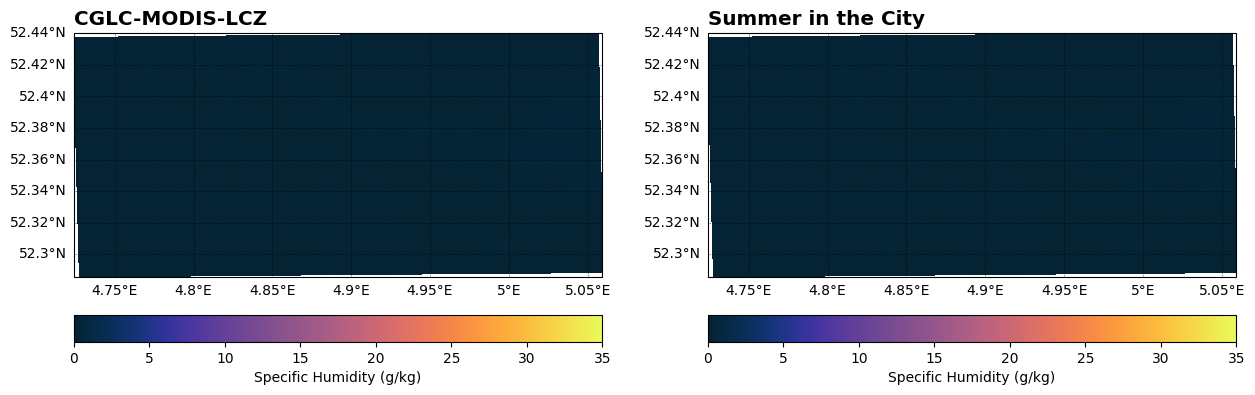

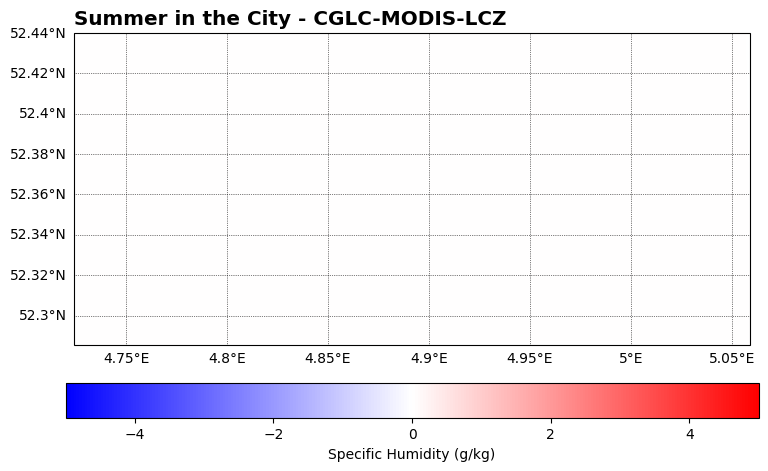

In [3]:
variables = [
    get_wrfout_q(wur_lcz_path, 34),
    get_wrfout_q(wur_path, 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "Specific Humidity (g/kg)"

fig, axes = side_by_side_plot(
    variables, titles, unit, vmin=0, vmax=35, cmap=cmo.thermal
)

plot_difference(variables, titles, unit, vmin=-5, vmax=5, cmap="bwr")

## Temperature


(<Figure size 1500x500 with 2 Axes>,
 <GeoAxes: title={'left': 'Summer in the City - CGLC-MODIS-LCZ'}>)

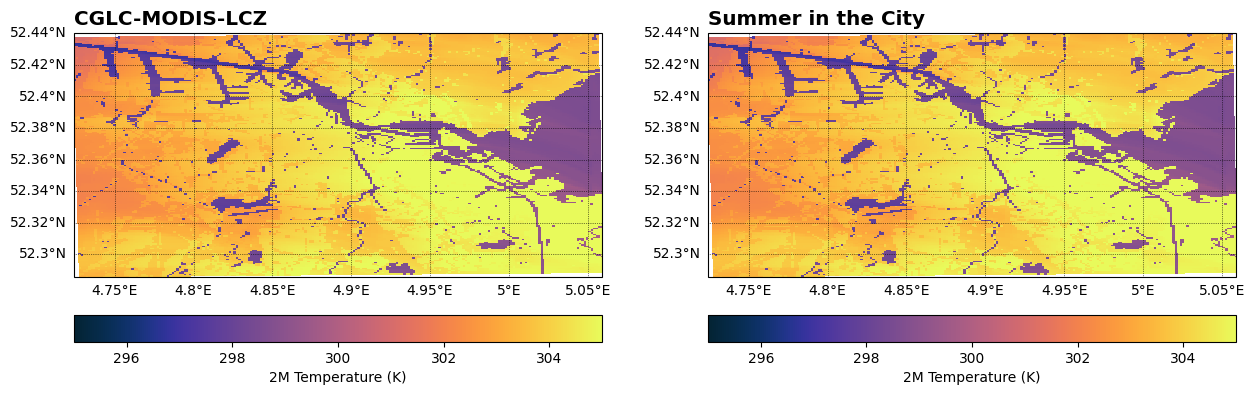

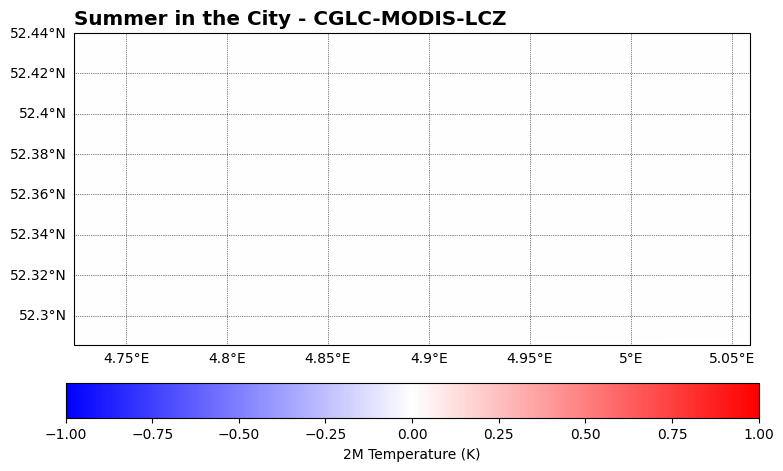

In [4]:
variables = [
    get_wrfout_var(wur_lcz_path, "T2", 34),
    get_wrfout_var(wur_path, "T2", 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "2M Temperature (K)"

fig, axes = side_by_side_plot(
    variables, titles, unit, vmin=295, vmax=305, cmap=cmo.thermal
)
plot_difference(variables, titles, unit, vmin=-1, vmax=1, cmap="bwr")

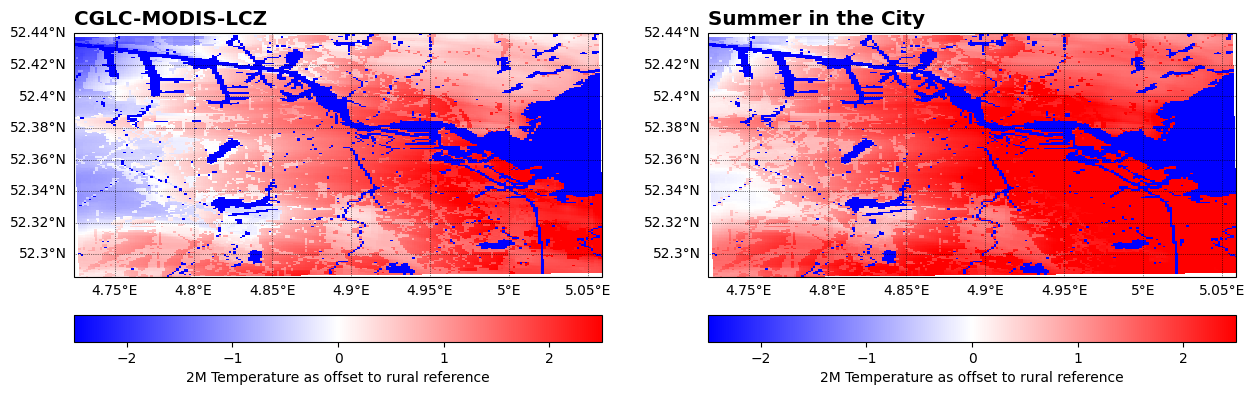

In [5]:
variables = [
    get_wrfout_uhi(wur_lcz_path, 34, landuse="MODIS"),
    get_wrfout_uhi(wur_path, 34, landuse="USGS"),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "2M Temperature as offset to rural reference"

fig, axes = side_by_side_plot(variables, titles, unit, vmin=-2.5, vmax=2.5, cmap="bwr")

## Wind


In [6]:
variables = [
    get_wrfout_wspd(wur_lcz_path, 34),
    get_wrfout_wspd(wur_path, 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "10m wind speed (m/s)"

fig, axes = side_by_side_plot(
    variables, titles, unit, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc")
)

# add streamlines
us = [
    get_wrfout_var(wur_lcz_path, "U10", 34),
    get_wrfout_var(wur_path, "U10", 34),
]
vs = [
    get_wrfout_var(wur_lcz_path, "V10", 34),
    get_wrfout_var(wur_path, "V10", 34),
]
for ax, u, v in zip(axes, us, vs):
    ax.streamplot(
        u.lon,
        u.lat,
        u,
        v,
        transform=ccrs.PlateCarree(),
        density=[0.6, 1],
        color="white",
        linewidth=0.8,
    )

# Plot difference
plot_difference(variables, titles, unit, vmin=-1, vmax=1, cmap="bwr")

/scratch-local/69025/ipykernel_1861620/3786466863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  variables, titles, unit, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc")


ValueError: 'cet_kbc' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cmo.algae', 'cmo.algae_i', 'cmo.algae_i_r', 'cmo.algae_r', 'cmo.algae_r_i', 'cmo.amp', 'cmo.amp_i', 'cmo.amp_i_r', 'cmo.amp_r', 'cmo.amp_r_i', 'cmo.balance', 'cmo.balance_i', 'cmo.balance_i_r', 'cmo.balance_r', 'cmo.balance_r_i', 'cmo.curl', 'cmo.curl_i', 'cmo.curl_i_r', 'cmo.curl_r', 'cmo.curl_r_i', 'cmo.deep', 'cmo.deep_i', 'cmo.deep_i_r', 'cmo.deep_r', 'cmo.deep_r_i', 'cmo.delta', 'cmo.delta_i', 'cmo.delta_i_r', 'cmo.delta_r', 'cmo.delta_r_i', 'cmo.dense', 'cmo.dense_i', 'cmo.dense_i_r', 'cmo.dense_r', 'cmo.dense_r_i', 'cmo.diff', 'cmo.diff_i', 'cmo.diff_i_r', 'cmo.diff_r', 'cmo.diff_r_i', 'cmo.gray', 'cmo.gray_i', 'cmo.gray_i_r', 'cmo.gray_r', 'cmo.gray_r_i', 'cmo.haline', 'cmo.haline_i', 'cmo.haline_i_r', 'cmo.haline_r', 'cmo.haline_r_i', 'cmo.ice', 'cmo.ice_i', 'cmo.ice_i_r', 'cmo.ice_r', 'cmo.ice_r_i', 'cmo.matter', 'cmo.matter_i', 'cmo.matter_i_r', 'cmo.matter_r', 'cmo.matter_r_i', 'cmo.oxy', 'cmo.oxy_i', 'cmo.oxy_i_r', 'cmo.oxy_r', 'cmo.oxy_r_i', 'cmo.phase', 'cmo.phase_i', 'cmo.phase_i_r', 'cmo.phase_r', 'cmo.phase_r_i', 'cmo.rain', 'cmo.rain_i', 'cmo.rain_i_r', 'cmo.rain_r', 'cmo.rain_r_i', 'cmo.solar', 'cmo.solar_i', 'cmo.solar_i_r', 'cmo.solar_r', 'cmo.solar_r_i', 'cmo.speed', 'cmo.speed_i', 'cmo.speed_i_r', 'cmo.speed_r', 'cmo.speed_r_i', 'cmo.tarn', 'cmo.tarn_i', 'cmo.tarn_i_r', 'cmo.tarn_r', 'cmo.tarn_r_i', 'cmo.tempo', 'cmo.tempo_i', 'cmo.tempo_i_r', 'cmo.tempo_r', 'cmo.tempo_r_i', 'cmo.thermal', 'cmo.thermal_i', 'cmo.thermal_i_r', 'cmo.thermal_r', 'cmo.thermal_r_i', 'cmo.topo', 'cmo.topo_i', 'cmo.topo_i_r', 'cmo.topo_r', 'cmo.topo_r_i', 'cmo.turbid', 'cmo.turbid_i', 'cmo.turbid_i_r', 'cmo.turbid_r', 'cmo.turbid_r_i', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

## Land use


In [7]:
variables = [
    get_wrfout_var(wur_lcz_path, "LU_INDEX", 34),
    get_wrfout_var(wur_path, "LU_INDEX", 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
landuse_type = ["MODIS", "USGS"]
unit = "Landuse index"

fig = plt.figure(figsize=(15, 5))

for i, (variable, title, landuse) in enumerate(zip(variables, titles, landuse_type)):
    ax = add_subplot(fig, 1, 2, i+1, title)
    ax.set_extent(get_extent(variable))
    cmap, norm = generate_cmap_for_landuse(landuse)
    plot_colormesh(fig, ax, variable, unit, cmap=cmap, norm=norm)

ValueError: num must be an integer with 1 <= num <= 2, not 0

<Figure size 1500x500 with 0 Axes>